   num_passengers sales_channel  trip_type  purchase_lead  length_of_stay  \
0               2      Internet  RoundTrip            262              19   
1               1      Internet  RoundTrip            112              20   
2               2      Internet  RoundTrip            243              22   
3               1      Internet  RoundTrip             96              31   
4               2      Internet  RoundTrip             68              22   

   flight_hour flight_day   route booking_origin  wants_extra_baggage  \
0            7        Sat  AKLDEL    New Zealand                    1   
1            3        Sat  AKLDEL    New Zealand                    0   
2           17        Wed  AKLDEL          India                    1   
3            4        Sat  AKLDEL    New Zealand                    0   
4           15        Wed  AKLDEL          India                    1   

   wants_preferred_seat  wants_in_flight_meals  flight_duration  \
0                     0        

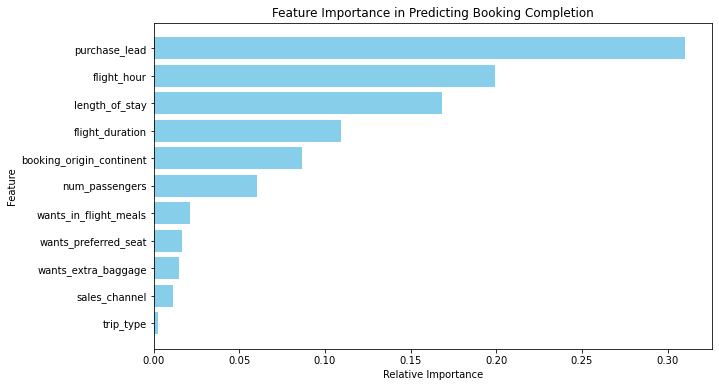

In [3]:
# 导入必要的库
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# 加载数据集
file_path = r'F:\Jobs\Certificates\British_Airways\Data\customer_booking.csv'
data = pd.read_csv(file_path)

# 显示数据集的前几行
print(data.head())

# 增强的国家到大洲映射
continent_mapping_enhanced = {
    'New Zealand': 'Oceania',
    'India': 'South Asia',
    'Australia': 'Oceania',
    'United States': 'North America',
    'Canada': 'North America',
    'United Kingdom': 'Europe',
    'Germany': 'Europe',
    'France': 'Europe',
    'China': 'East Asia',
    'Japan': 'East Asia',
    'Brazil': 'South America',
    'South Africa': 'Africa',
    'Nigeria': 'Africa',
    'Mexico': 'North America',
    'Argentina': 'South America',
    'Russia': 'Europe',
    'Turkey': 'Europe',
    'Egypt': 'Africa',
    'Thailand': 'Southeast Asia',
    'Singapore': 'Southeast Asia',
    'Malaysia': 'Southeast Asia',
    'Indonesia': 'Southeast Asia',
    'Saudi Arabia': 'Middle East',
    'UAE': 'Middle East',
    'Pakistan': 'South Asia',
    'Bangladesh': 'South Asia',
    'Vietnam': 'Southeast Asia',
    # Add more countries as needed
}

# 应用增强的大陆映射
data['booking_origin_continent'] = data['booking_origin'].map(continent_mapping_enhanced)

# 用'Other'填充大陆列中的任何缺失值
data['booking_origin_continent'].fillna('Other', inplace=True)

# 编码大洲
data['booking_origin_continent'] = LabelEncoder().fit_transform(data['booking_origin_continent'])

# 编码 sales_channel 和 trip_type
data['sales_channel'] = LabelEncoder().fit_transform(data['sales_channel'])
data['trip_type'] = LabelEncoder().fit_transform(data['trip_type'])

# 定义包括更新的大陆信息的特征列
feature_columns = [
    'num_passengers', 'sales_channel', 'trip_type', 'purchase_lead', 
    'length_of_stay', 'flight_hour', 'wants_extra_baggage', 
    'wants_preferred_seat', 'wants_in_flight_meals', 'flight_duration', 
    'booking_origin_continent'
]

# 定义目标列
target_column = 'booking_complete'

# 将数据分成训练集和测试集
X = data[feature_columns]
y = data[target_column]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 训练 RandomForest 模型
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# 进行预测并再次评估模型
y_pred = rf_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", report)

# 获取更新的特征重要性
feature_importance = rf_model.feature_importances_

# 为可视化创建一个 DataFrame
feature_importance_df = pd.DataFrame({
    'feature': feature_columns,
    'importance': feature_importance
}).sort_values(by='importance', ascending=False)

# 绘制更新的特征重要性
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['feature'], feature_importance_df['importance'], color='skyblue')
plt.xlabel('Relative Importance')
plt.ylabel('Feature')
plt.title('Feature Importance in Predicting Booking Completion')
plt.gca().invert_yaxis()
plt.show()
